In [16]:
from PIL import Image
import pytesseract

In [12]:
im = Image.open('yanzenma.jpg')

In [3]:
im.size

(160, 70)

In [13]:
# 最基本的用法
t = pytesseract.image_to_string(im)

In [7]:
im.show()

In [16]:
t

u'38-3'

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
import requests

In [3]:
r=requests.get('http://113.108.219.40/Dop/CheckCode.aspx?codemark=38.63767845258748')

In [4]:
with open('code.gif','wb') as f:
    f.write(r.content)

In [23]:
import os
print(os.getcwd())
# im=Image.open('code.png')
img = cv2.imread('foo0.png')
print(img.shape)
# print(type(img))
# print(img.size)
# converted_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

C:\git\base_function\image_detect
(22, 73, 3)


In [18]:
im.size

(73, 22)

In [31]:
dst = cv2.fastNlMeansDenoisingColored(img,None,35,35,7,21)

In [21]:
print cv2.getBuildInformation()


General configuration for OpenCV 2.4.13.6 =====================================
  Version control:               2.4.13.6

  Platform:
    Timestamp:                   2018-02-22T00:42:24Z
    Host:                        Windows 10.0.16299 AMD64
    CMake:                       3.9.3
    CMake generator:             Visual Studio 14 2015
    CMake build tool:            C:/Program Files (x86)/MSBuild/14.0/bin/MSBuild.exe
    MSVC:                        1900

  C/C++:
    Built as dynamic libs?:      NO
    C++ Compiler:                C:/Program Files (x86)/Microsoft Visual Studio 14.0/VC/bin/cl.exe  (ver 19.0.24215.1)
    C++ flags (Release):         /DWIN32 /D_WINDOWS /W4 /GR /EHa  /D _CRT_SECURE_NO_DEPRECATE /D _CRT_NONSTDC_NO_DEPRECATE /D _SCL_SECURE_NO_WARNINGS /Gy /bigobj /arch:SSE2 /Oi /fp:fast  /wd4251 /wd4275 /wd4589 /wd4359 /MP8  /MT /O2 /Ob2 /DNDEBUG  /Zi
    C++ flags (Debug):           /DWIN32 /D_WINDOWS /W4 /GR /EHa  /D _CRT_SECURE_NO_DEPRECATE /D _CRT_NONSTDC_NO_DEPRE

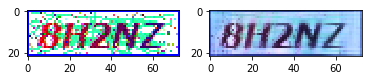

In [32]:
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(dst)
plt.show()

In [33]:
pytesseract.image_to_string(dst)

AttributeError: 'numpy.ndarray' object has no attribute 'split'

In [22]:
import sys

def processImage(infile):
    try:
        im = Image.open(infile)
    except IOError:
        print "Cant load", infile
        sys.exit(1)
    i = 0
    mypalette = im.getpalette()

    try:
        while 1:
            im.putpalette(mypalette)
            new_im = Image.new("RGBA", im.size)
            new_im.paste(im)
            new_im.save('foo'+str(i)+'.png')

            i += 1
            im.seek(im.tell() + 1)

    except EOFError:
        pass # end of sequence

processImage('code.gif')